In [2]:
import stereo as st
import utils
from stereo.core.ms_data import MSData
from stereo.core.ms_pipeline import slice_generator
import pandas as pd

In [4]:
# read the B01809C2 data
data_path = "B01809C2/GeneExpMatrix/B01809C2.cellbin.gef"
st.io.read_gef_info(data_path)
data1 = st.io.read_gef(file_path=data_path, bin_type = "cell_bins")

[2023-07-28 12:20:02][Stereo][25016][MainThread][31924][reader][1161][INFO]: This is GEF file which contains cell bin infomation.
[2023-07-28 12:20:02][Stereo][25016][MainThread][31924][reader][1162][INFO]: bin_type: cell_bins
[2023-07-28 12:20:03][Stereo][25016][MainThread][31924][reader][1168][INFO]: Number of cells: 116029
[2023-07-28 12:20:03][Stereo][25016][MainThread][31924][reader][1171][INFO]: Number of gene: 41697
[2023-07-28 12:20:03][Stereo][25016][MainThread][31924][reader][1174][INFO]: Resolution: 500
[2023-07-28 12:20:03][Stereo][25016][MainThread][31924][reader][1177][INFO]: offsetX: 2
[2023-07-28 12:20:03][Stereo][25016][MainThread][31924][reader][1180][INFO]: offsetY: 0
[2023-07-28 12:20:03][Stereo][25016][MainThread][31924][reader][1183][INFO]: Average number of genes: 116.51246643066406
[2023-07-28 12:20:03][Stereo][25016][MainThread][31924][reader][1186][INFO]: Maximum number of genes: 1440
[2023-07-28 12:20:03][Stereo][25016][MainThread][31924][reader][1189][INFO]:

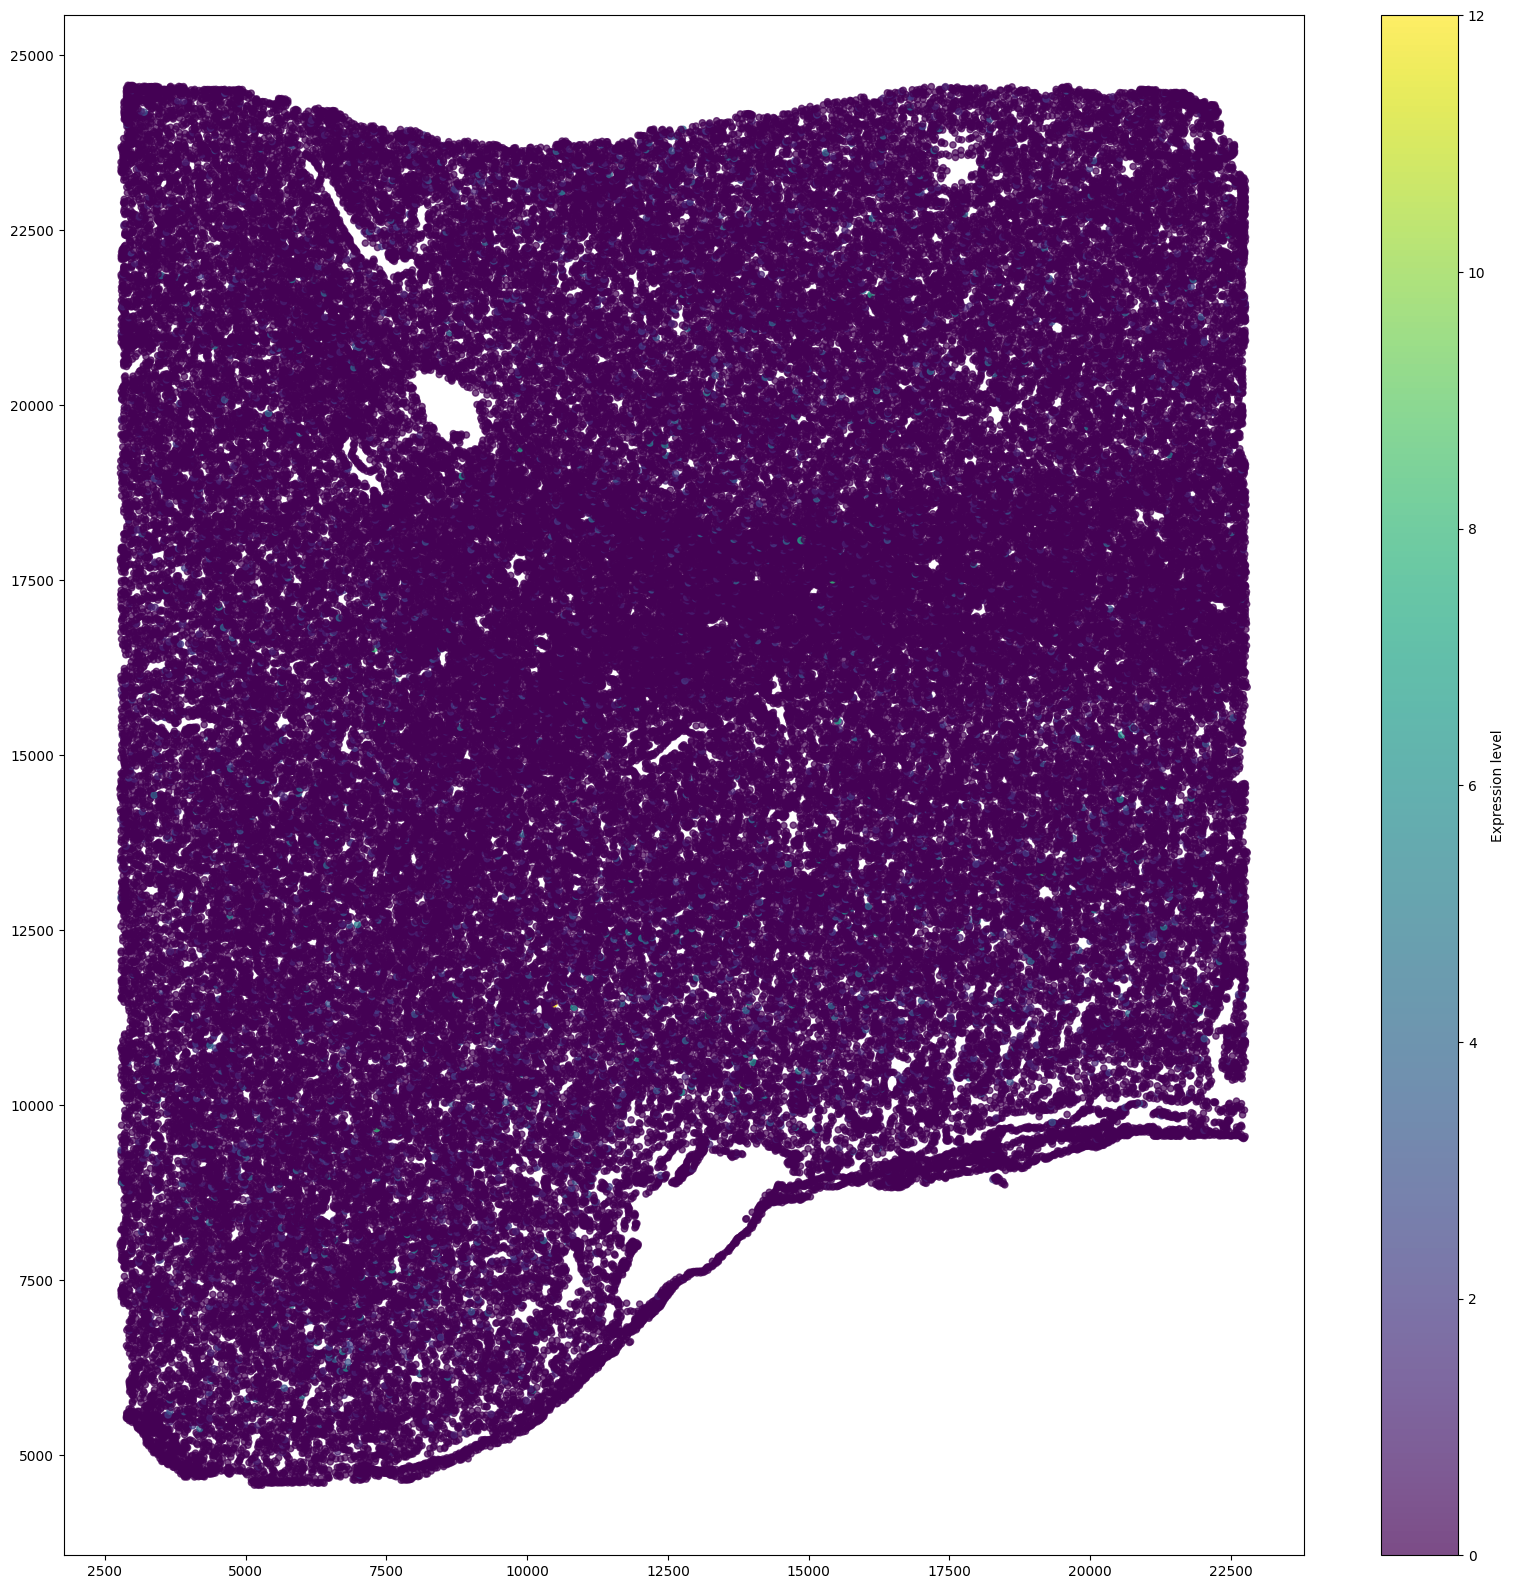

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

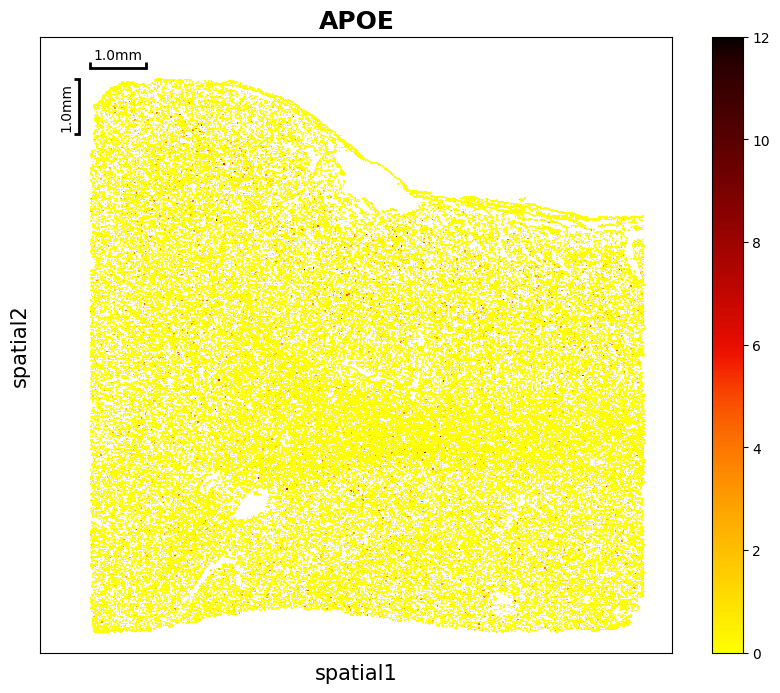

In [6]:
# plot the genes expression on each cell
utils.feature_plot(data1, "APOE", fig_size = (20, 20), spot_size= 20)

# alternatively, you can use the functions in stereo 
data1.plt.spatial_scatter_by_gene("APOE")

Shape of image:  (1, 1, 16686, 18495, 1)


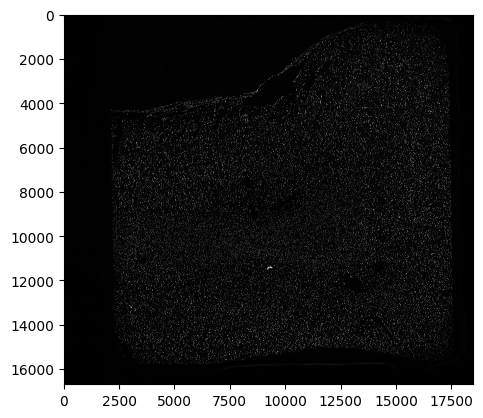

In [7]:
# to check the nucleus image
utils.show_nucleus_image("Nuclei_Images/20230515_SC_B01809C2_STO032-14.czi")

In [8]:
# to check the identified genes for each spot
# We will need this information when writing the manuscript
utils.genes_detected(data1)

median_value  mean_value  max_value  min_value
0            78  116.512467       1440          1

In [10]:
# draw the circle
filtered_position = utils.draw_circle(data1, center = [10000, 10000], radius = 2000)

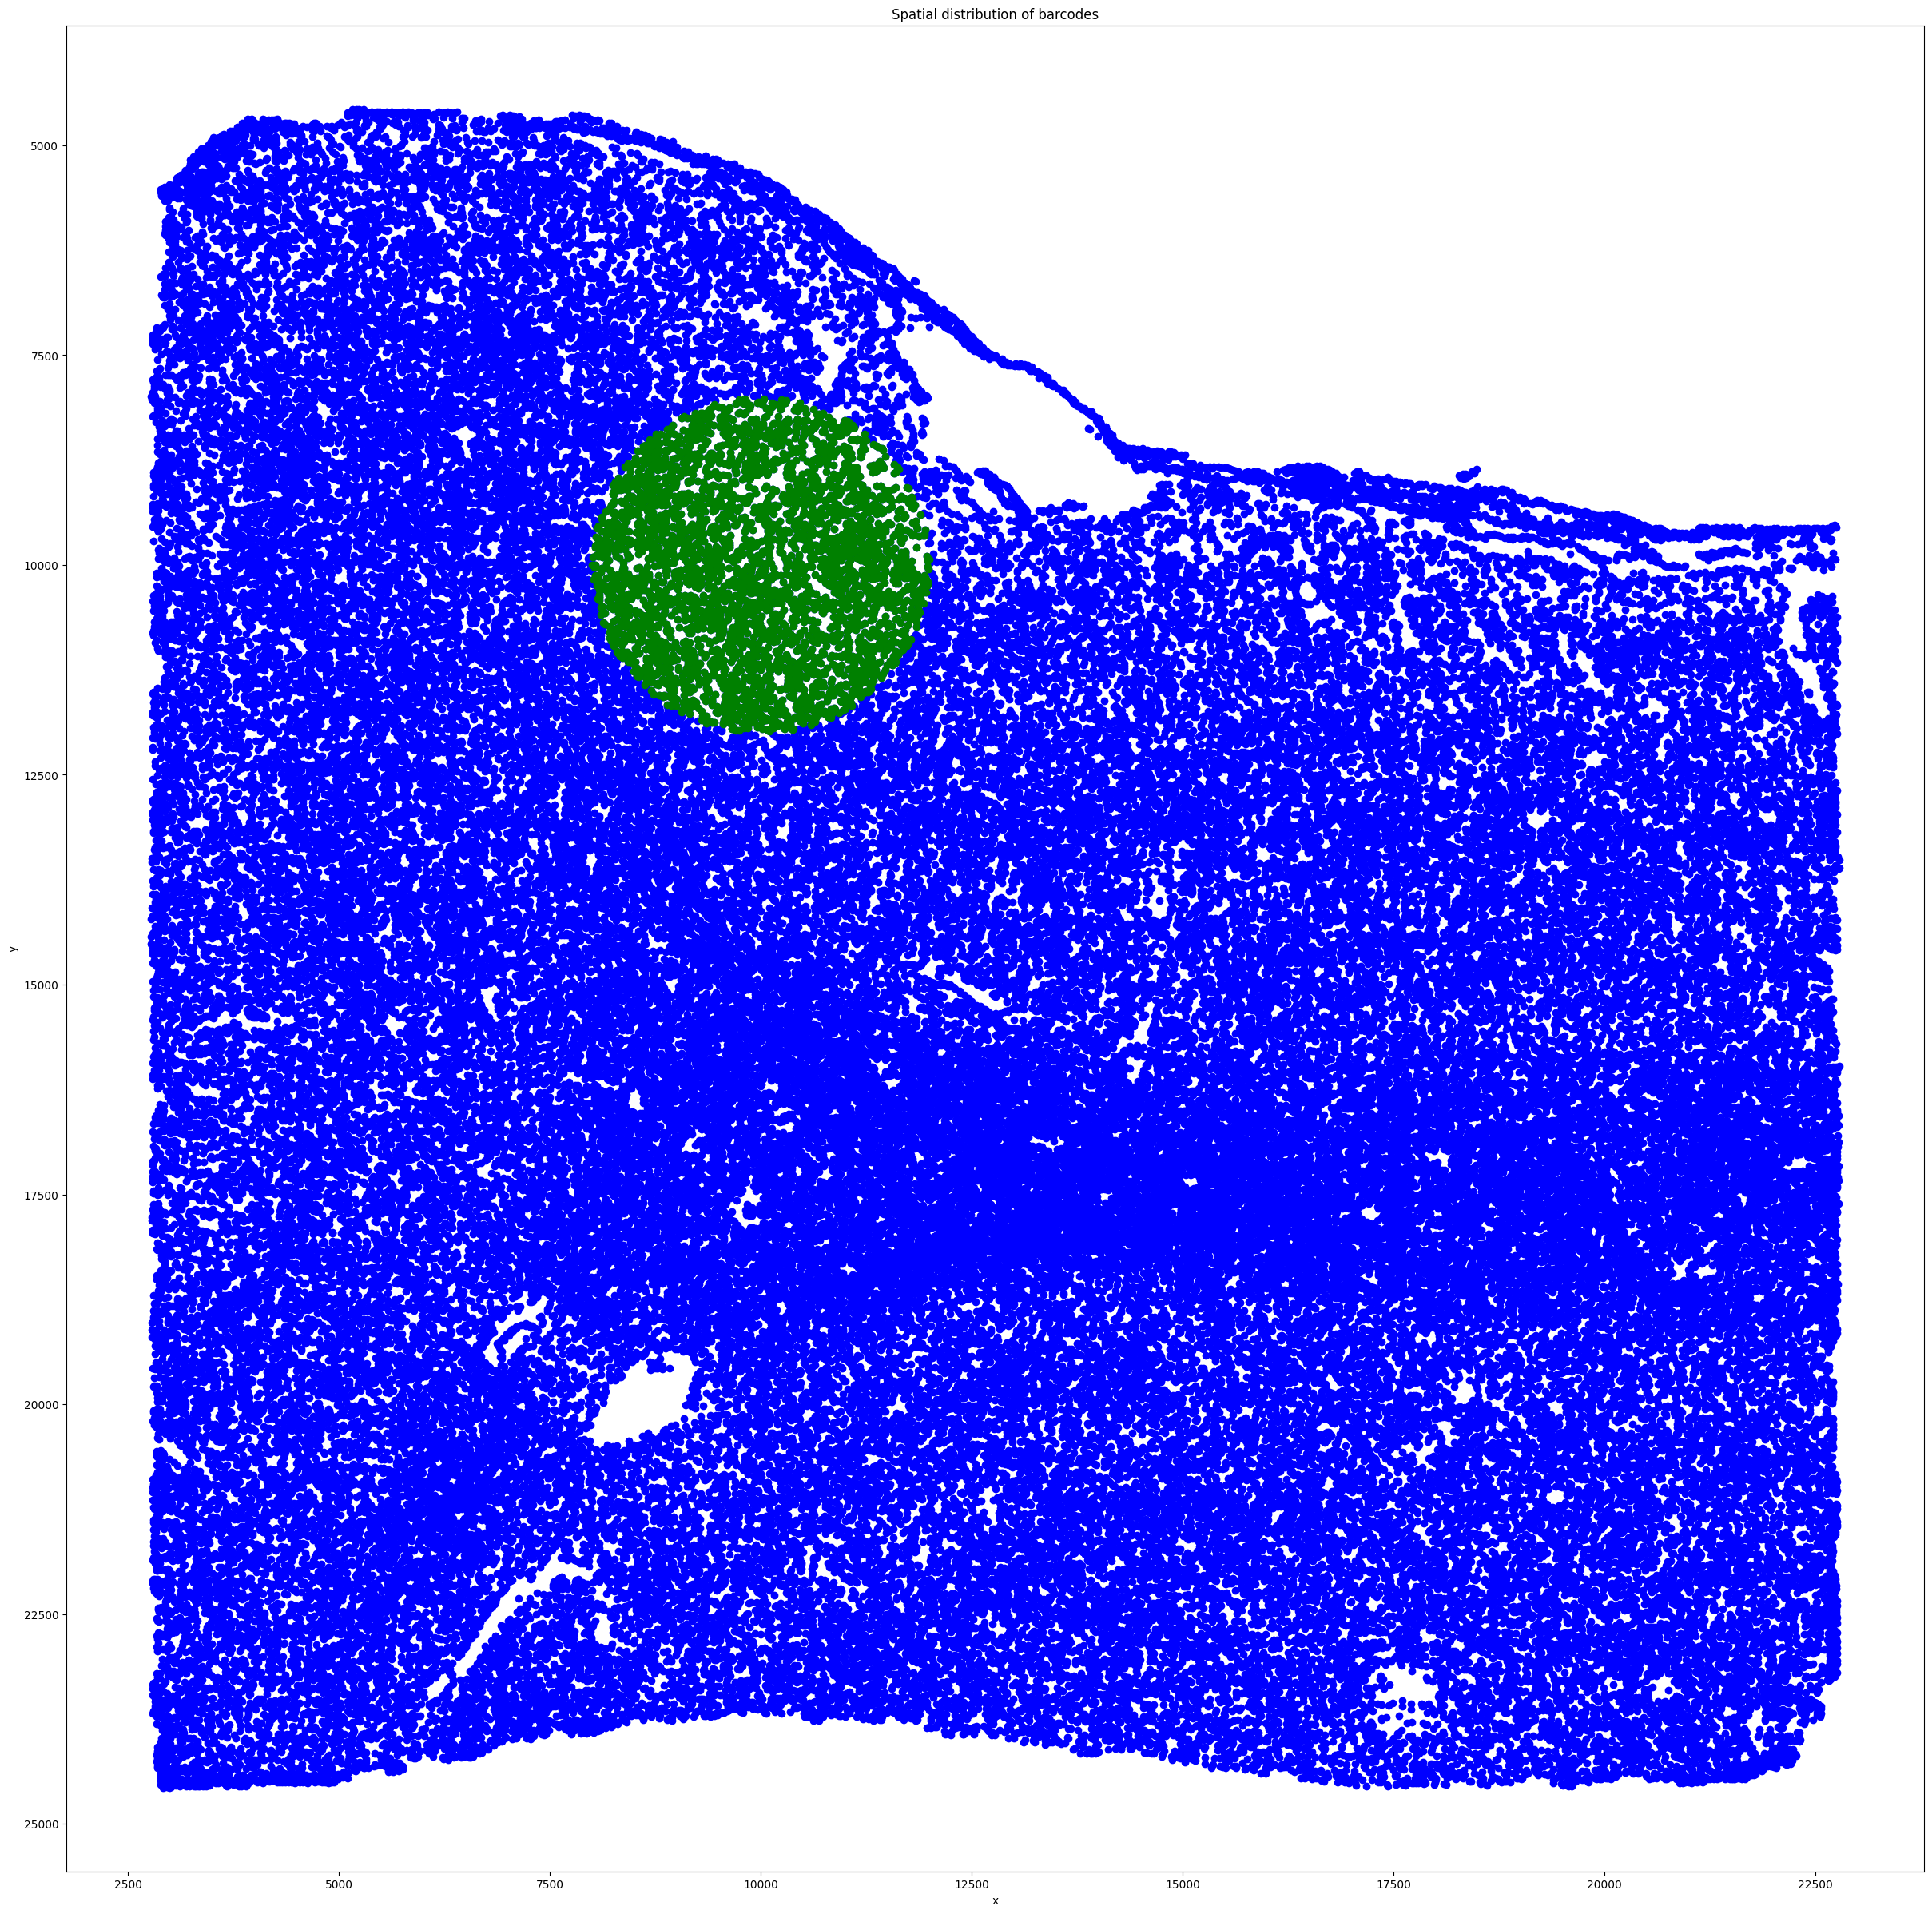

In [13]:
# check the selected spots
utils.check_circle(data1, filtered_position)

In [14]:
# find the selected barcode gene expression matrix
utils.find_barcode_expression(data1,filtered_position) # 3790 cells in this area

MIR1302-2HG  AL627309.1  CICP27  AL627309.6  WASH7P  \
40570261086100            0           0       0           0       0   
40523016445866            0           0       0           0       0   
40346922786769            0           0       0           0       0   
40200893898744            0           0       0           0       0   
41665477746574            0           0       0           0       0   
...                     ...         ...     ...         ...     ...   
45719926877789            0           0       0           0       0   
45088566685298            0           0       0           0       0   
45505178513027            0           0       0           0       0   
46351287070237            0           0       0           0       0   
46510200860202            0           0       0           0       0   

                AL627309.5  FO538757.1  RPL23AP24  AP006222.1  AL732372.2  \
40570261086100           0           0          0           0           0   
40523016445866           0           0          0           0           0   
40346922786769           0           0          0           0           0   
40200893898744           0           0          0           0           0   
41665477746574           0           0          0           0           0   
...                    ...         ...        ...         ...         ...   
45719926877789           0           0          0           0           0   
45088566685298           0           0          0           0           0   
45505178513027           0           0          0           0           0   
46351287070237           0           0          0           0           0   
46510200860202           0           0          0           0           0   

                ...  AC011043.2  AC011043.1  AL592183.1  AC007325.1  \
40570261086100  ...           0           0           0           0   
40523016445866  ...           0           0           0           0   
40346922786769  ...           0           0           0           0   
40200893898744  ...           0           0           0           0   
41665477746574  ...           0           0           0           0   
...             ...         ...         ...         ...         ...   
45719926877789  ...           0           0           0           0   
45088566685298  ...           0           0           0           0   
45505178513027  ...           0           0           0           0   
46351287070237  ...           0           0           0           0   
46510200860202  ...           0           0           0           0   

                AC007325.2  AC007325.4  RNA5-8SN2  AL354822.1  AC004556.1  \
40570261086100           0           0          0           0           0   
40523016445866           0           0          0           0           0   
40346922786769           0           0          0           0           0   
40200893898744           0           0          0           0           0   
41665477746574           0           0          0           0           0   
...                    ...         ...        ...         ...         ...   
45719926877789           0           0          0           0           0   
45088566685298           0           0          0           0           0   
45505178513027           0           0          0           0           0   
46351287070237           0           0          0           0           0   
46510200860202           0           0          0           0           0   

                AC240274.1  
40570261086100           0  
40523016445866           0  
40346922786769           0  
40200893898744           0  
41665477746574           0  
...                    ...  
45719926877789           0  
45088566685298           0  
45505178513027           0  
46351287070237           0  
46510200860202           0  

[3790 rows x 41697 columns]